<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/multiclass_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification
We can go through the same steps as with binary classification.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-05-20 19:17:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.0MB/s    in 13s     

2023-05-20 19:17:17 (38.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

# Walk through the classes
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 10 directori

In [4]:
# Setup train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# 1. Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


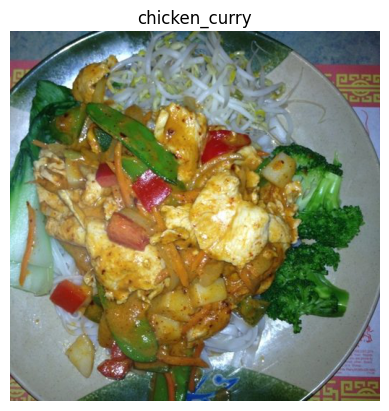

In [7]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# 2. Preprocess

# Set the seed
tf.random.set_seed(42)

# Define datagens
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
# Build a CNN (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile CNN
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data) * 0.25,
            validation_data=valid_data,
            validation_steps=len(valid_data) * 0.5)

Epoch 1/10
58/58 [==============================] - 32s 376ms/step - loss: 2.3228 - accuracy: 0.1414 - val_loss: 2.2723 - val_accuracy: 0.1352
Epoch 2/10
58/58 [==============================] - 20s 346ms/step - loss: 2.2032 - accuracy: 0.2060 - val_loss: 2.2209 - val_accuracy: 0.1883
Epoch 3/10
58/58 [==============================] - 21s 355ms/step - loss: 2.0594 - accuracy: 0.2807 - val_loss: 2.1171 - val_accuracy: 0.2484
Epoch 4/10
58/58 [==============================] - 20s 345ms/step - loss: 1.9191 - accuracy: 0.3565 - val_loss: 2.0529 - val_accuracy: 0.2695
Epoch 5/10
58/58 [==============================] - 21s 353ms/step - loss: 1.8199 - accuracy: 0.3829 - val_loss: 2.0307 - val_accuracy: 0.2656
Epoch 6/10
58/58 [==============================] - 17s 292ms/step - loss: 1.6860 - accuracy: 0.4423 - val_loss: 2.0771 - val_accuracy: 0.2914
Epoch 7/10
58/58 [==============================] - 21s 354ms/step - loss: 1.5417 - accuracy: 0.4946 - val_loss: 2.0488 - val_accuracy: 0.2953

In [11]:
# Reduce overfitting with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [12]:
model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data) * 0.25,
            validation_data=valid_data,
            validation_steps=len(valid_data) * 0.5)

Epoch 1/10
58/58 [==============================] - 40s 667ms/step - loss: 2.2677 - accuracy: 0.1804 - val_loss: 2.1808 - val_accuracy: 0.2062
Epoch 2/10
58/58 [==============================] - 39s 665ms/step - loss: 2.2167 - accuracy: 0.1890 - val_loss: 2.1497 - val_accuracy: 0.2375
Epoch 3/10
58/58 [==============================] - 39s 671ms/step - loss: 2.1773 - accuracy: 0.1997 - val_loss: 2.1106 - val_accuracy: 0.2477
Epoch 4/10
58/58 [==============================] - 39s 667ms/step - loss: 2.1099 - accuracy: 0.2505 - val_loss: 2.0793 - val_accuracy: 0.2641
Epoch 5/10
58/58 [==============================] - 40s 692ms/step - loss: 2.1261 - accuracy: 0.2442 - val_loss: 2.0626 - val_accuracy: 0.2547
Epoch 6/10
58/58 [==============================] - 39s 670ms/step - loss: 2.0821 - accuracy: 0.2765 - val_loss: 1.9980 - val_accuracy: 0.2992
Epoch 7/10
58/58 [==============================] - 39s 666ms/step - loss: 2.0874 - accuracy: 0.2569 - val_loss: 1.9496 - val_accuracy: 0.3117

In [20]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename=filename)
  # Decode the file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image's values
  img = img/255.
  return img


def pred_and_plot(model, filename, class_names=class_names):
  # Import target image and preprocess
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add multi-class logic
  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}, Odds: {[(pred[0][i], name) for i, name in enumerate(class_names)]}")
  plt.axis(False)

In [15]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-05-20 19:36:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-05-20 19:36:51 (118 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-05-20 19:36:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

1/1 [==============================] - 0s 26ms/step


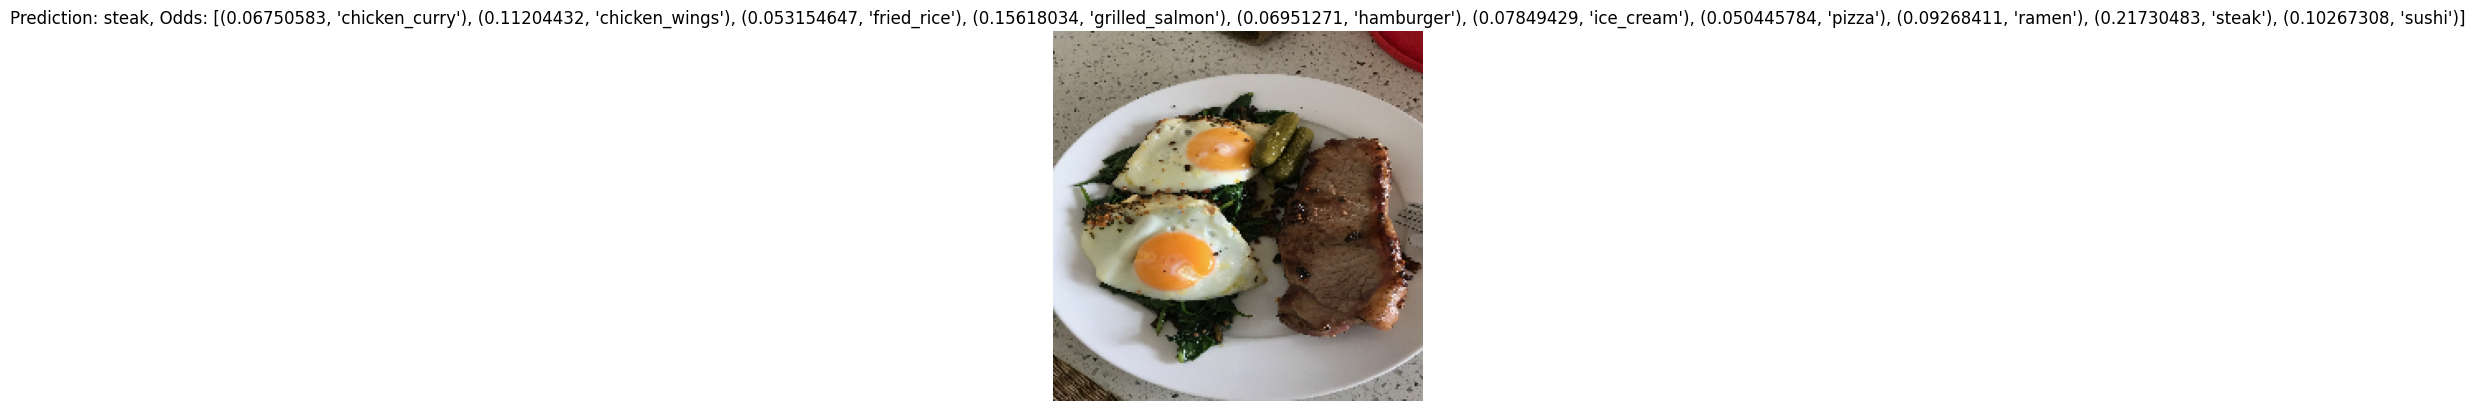

In [22]:
# Make a prediction:
pred_and_plot(model=model_2,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 29ms/step


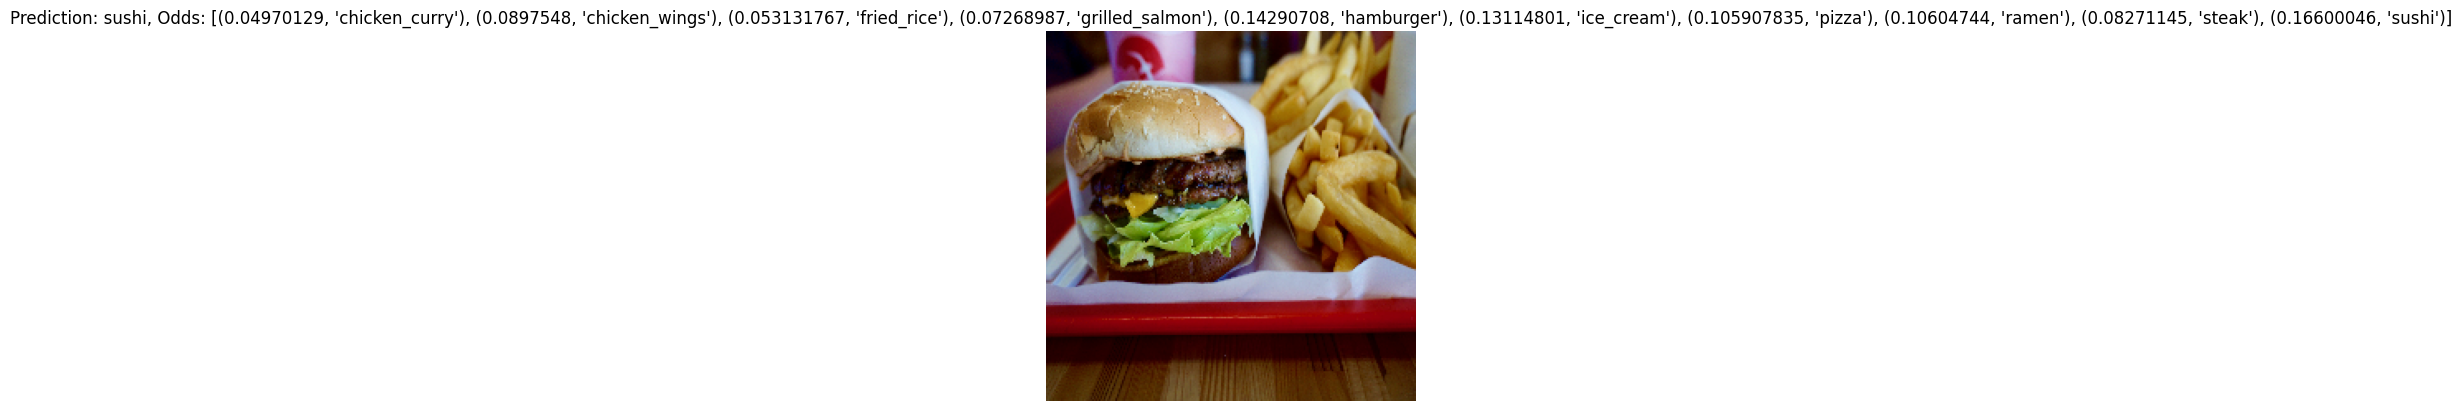

In [23]:
pred_and_plot(model=model_2,
              filename='03-hamburger.jpeg',
              class_names=class_names)


1/1 [==============================] - 0s 18ms/step


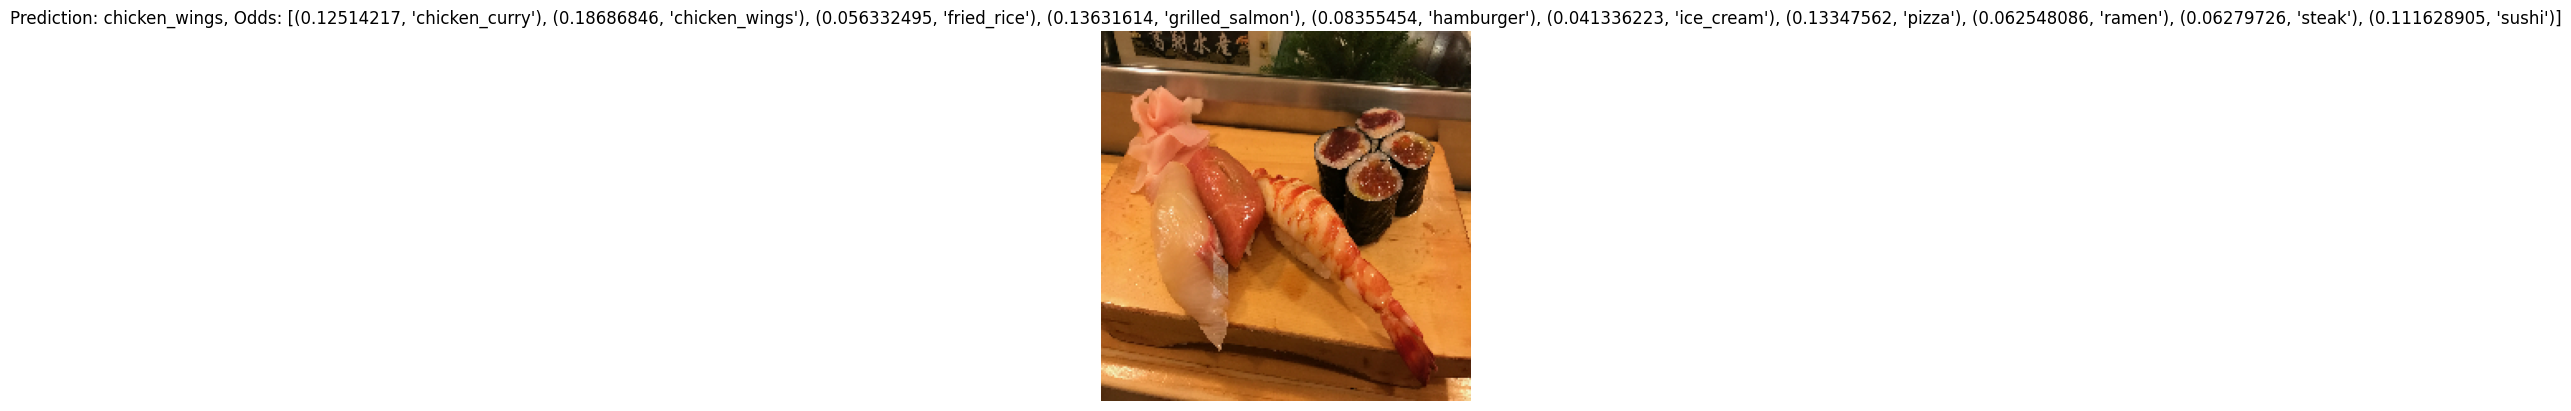

In [24]:
pred_and_plot(model=model_2,
              filename='03-sushi.jpeg',
              class_names=class_names)


In [25]:
!wget https://avatars.githubusercontent.com/u/97265671?v=4

--2023-05-20 19:46:13--  https://avatars.githubusercontent.com/u/97265671?v=4
Resolving avatars.githubusercontent.com (avatars.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to avatars.githubusercontent.com (avatars.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29067 (28K) [image/jpeg]
Saving to: ‘97265671?v=4’

97265671?v=4        100%[===================>]  28.39K  --.-KB/s    in 0s      

2023-05-20 19:46:13 (107 MB/s) - ‘97265671?v=4’ saved [29067/29067]



1/1 [==============================] - 0s 28ms/step


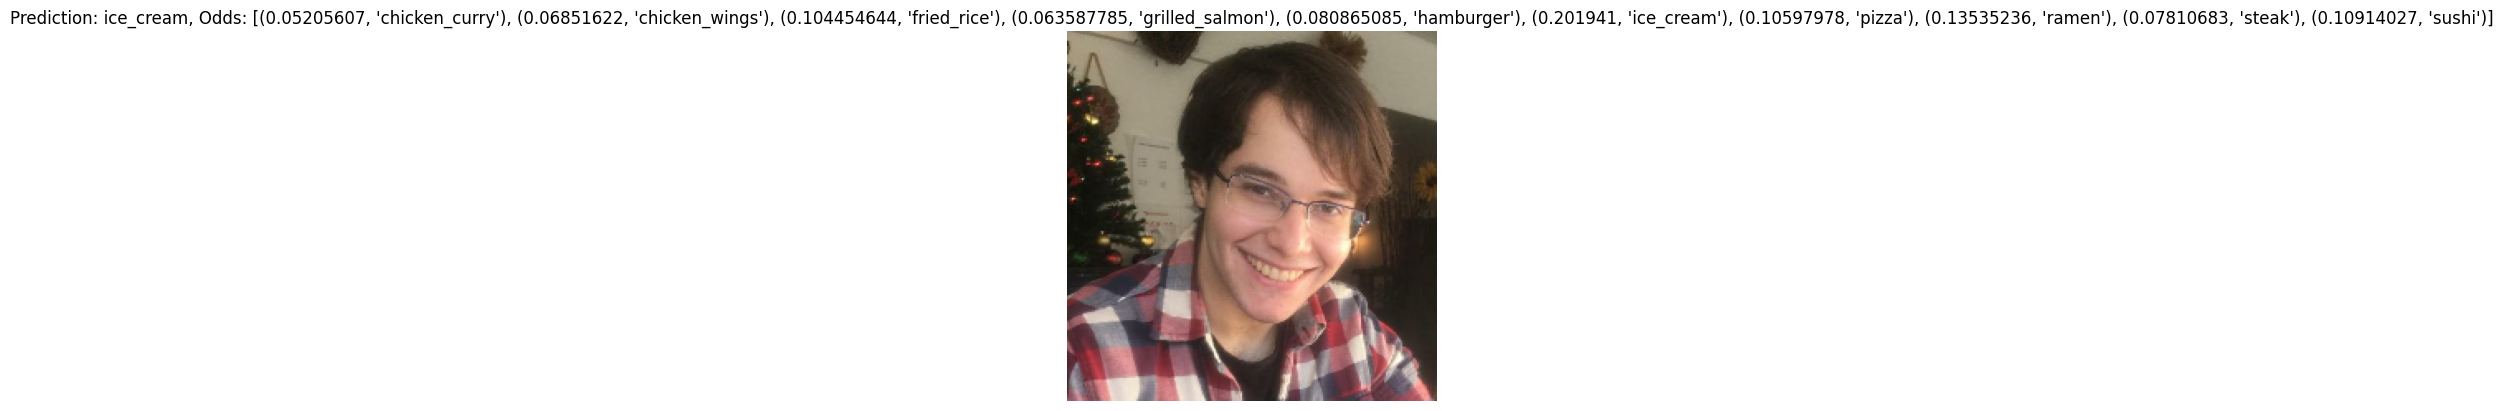

In [26]:
pred_and_plot(model=model_2,
              filename='me.png',
              class_names=class_names)

In [27]:
# Save a model
model_2.save("trained_model_2")

In [29]:
loaded_model_2 = tf.keras.models.load_model("trained_model_2")
loaded_model_2.evaluate(valid_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.9403 - accuracy: 0.3396


[1.9402506351470947, 0.33959999680519104]